# Lecture 2 - Splitting and Cross-validation

*Hayley Boyce, Wednesday April 21th 2021*

In [34]:
# Importing our libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sys
sys.path.append('code/')
from display_tree import display_tree
from plot_classifier import plot_classifier

### Lecture Learning Objectives 

- Explain the concept of generalization.
- Split a dataset into train and test sets using `train_test_split` function.
- Explain the difference between train, validation, test, and "deployment" data.
- Identify the difference between training error, validation error, and test error.
- Explain cross-validation and use `cross_val_score()` and `cross_validate()` to calculate cross-validation error.
- Explain overfitting, underfitting, and the fundamental tradeoff.
- State the golden rule and identify the scenarios when it's violated.

## Five Minute Recap/ Lightning Questions 

- What is an example of machine learning? 
- Which type of machine learning does not have labels?
- What is an example of a Regression problem? 
- In a dataframe, what is an observation? 
- What is the first node of a Decision Tree called?
- Where/who determines the parameter values?
- What library will we be using for machine learning? 

In [150]:
# load data
voting_df = pd.read_csv('data/cities_USA.csv',index_col=0)  

voting_df.head()

,lon,lat,vote
1,-80.162475,25.692104,blue
2,-80.214360,25.944083,blue
3,-80.094133,26.234314,blue
4,-80.248086,26.291902,blue
5,-81.789963,26.348035,blue


In [151]:
# feature table
X = voting_df.drop(columns='vote') 

# the target variable
y = voting_df[['vote']] 

# initiate model framework with a decision tree of max_depth 2
model = DecisionTreeClassifier(max_depth=2) 

# training the model
model.fit(X, y)  

# new longitude and latitude coordinates

lon_lat_coords = np.array([[-75, 56]])

# predict on coordinates
prediction = model.predict(lon_lat_coords)  


print('With a latitude of', lon_lat_coords[0,1],
      'and a longitude of', lon_lat_coords[0,0], 
      'the model predicted', prediction[0])

With a latitude of 56 and a longitude of -75 the model predicted blue


### Some lingering questions

1. How do we choose a value of `max_depth` (or other hyperparameters)?
2. Why not just use large `max_depth` for every supervised learning problem and get super high accuracy?
3. Is model performance on the training data a good indication of how it will perform on new data?


We will be answering these questions in this lecture. 

## Generalization

### Visualizing model complexity using decision boundaries

In the last lecture, we saw that we could visualize the splitting of decision trees using these boundaries. 

So let's look back at our cities dataset.

In [152]:
voting_df = pd.read_csv('data/cities_USA.csv',index_col=0)  
voting_df.head()

,lon,lat,vote
1,-80.162475,25.692104,blue
2,-80.214360,25.944083,blue
3,-80.094133,26.234314,blue
4,-80.248086,26.291902,blue
5,-81.789963,26.348035,blue


We then create our feature table and our target objects (`X` and `y`) 

In [153]:
X = cities_df.drop(columns=["vote"])
X.head()

,lon,lat
1,-80.162475,25.692104
2,-80.214360,25.944083
3,-80.094133,26.234314
4,-80.248086,26.291902
5,-81.789963,26.348035


In [154]:
y = cities_df["vote"]
y.head()

1    blue
2    blue
3    blue
4    blue
5    blue
Name: vote, dtype: object

Let's build our model now. 

We're going to build a decision tree classifier and set the `max_depth` hyperparameter to 1 to create a decision stump. 



In [155]:
depth = 1
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X, y);
model.score(X, y)

0.7475

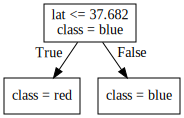

In [156]:
display_tree(X.columns, model, "imgs/dt_md_1")

In this decision tree there is only 1 split.  

In [157]:
model.score(X, y)

0.7475

When we score it on data that it’s already seen, we get an accuracy of 74.75%.

Plotting the values, we see the decision boundary separating the 2 regions where lat=37.682.

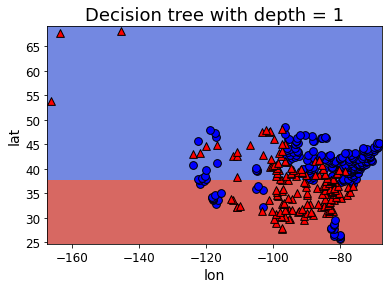

In [159]:
plot_classifier(X, y, model, ticks=True);
plt.xticks(fontsize= 12);
plt.yticks(fontsize= 12);
plt.xlabel('lon', fontsize=14);
plt.ylabel('lat', fontsize=14);
plt.title("Decision tree with depth = %d" % (depth), fontsize=18);

Ok, now let's see what happens to our decision boundaries when we change our maximum tree depth to 2. 

In [160]:
depth = 2
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X, y);
model.score(X, y)

0.8275

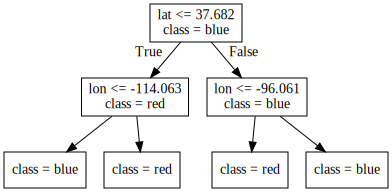

In [161]:
display_tree(X.columns, model, "imgs/dt_md_2")

The decision boundaries are created by asking 3 questions (only possible to ask 2 question per observation) and we can see 3 splits now. 

Our score here has increased from 74.75% to 82.75%.

When we graph it, we can now see 3 boundaries. 2 where `lon` equals -114.063 and -96.061 and another where `lat` equals 37.682.  

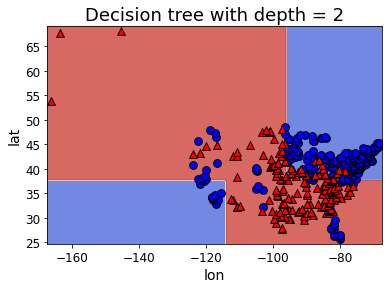

In [162]:
plot_classifier(X, y, model, ticks=True);
plt.xticks(fontsize= 12);
plt.yticks(fontsize= 12);
plt.xlabel('lon', fontsize=14);
plt.ylabel('lat', fontsize=14);
plt.title("Decision tree with depth = %d" % (depth), fontsize=18);

Now let’s continue on making a new model with a hyperparameter `max_depth` equal to 4. 

In [163]:
depth = 4
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X, y);
model.score(X, y)

0.9025

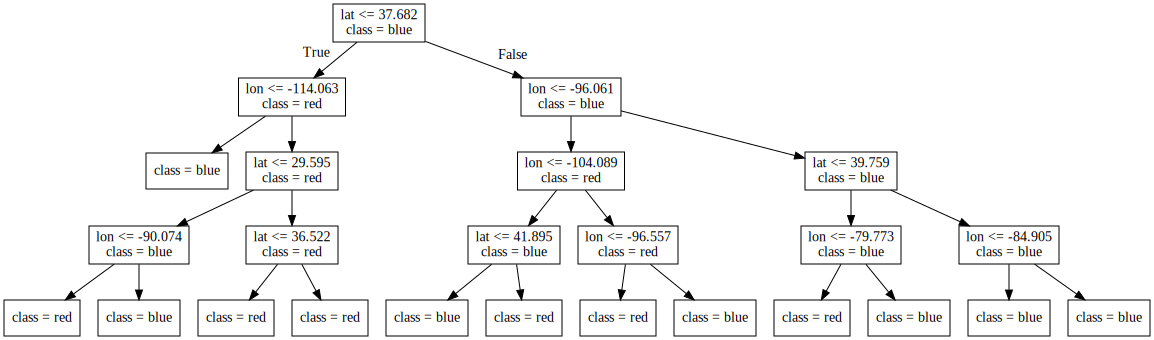

In [164]:
display_tree(X.columns, model, "imgs/dt_md_4")

Our score now has shot up to 90.25% and we have way more splits now.

We can see our boundaries are getting more complex. 

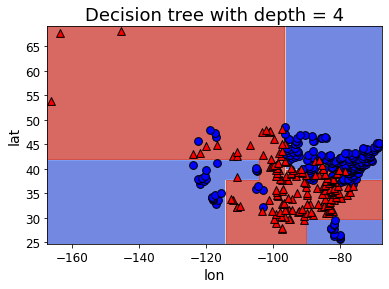

In [165]:
plot_classifier(X, y, model, ticks=True);
plt.xticks(fontsize= 12);
plt.yticks(fontsize= 12);
plt.xlabel('lon', fontsize=14);
plt.ylabel('lat', fontsize=14);
plt.title('Decision tree with depth = %d' % (depth), fontsize=18);

What happens if we give the model an unlimited max_depth?

In [166]:
model = DecisionTreeClassifier()
model.fit(X, y);
model.score(X, y)

1.0

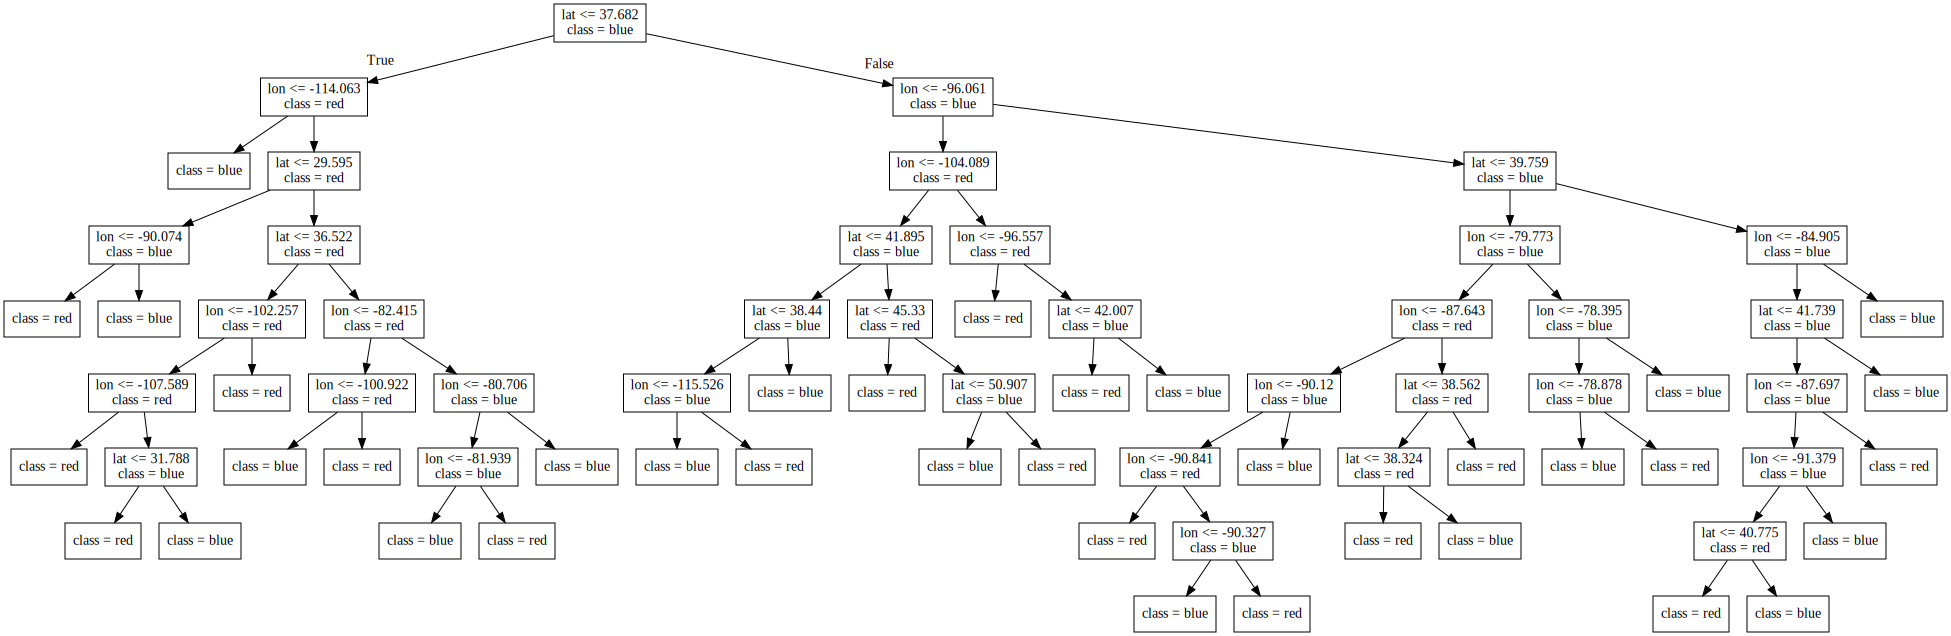

In [167]:
display_tree(X.columns, model, "imgs/dt_md_unlimited")

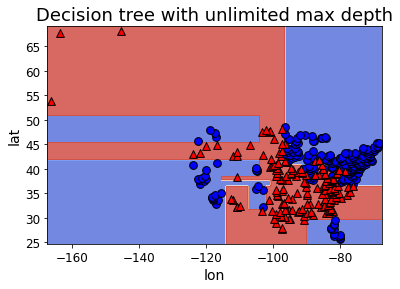

In [168]:
plot_classifier(X, y, model, ticks=True);
plt.xticks(fontsize= 12);
plt.yticks(fontsize= 12);
plt.xlabel('lon', fontsize=14);
plt.ylabel('lat', fontsize=14);
plt.title('Decision tree with unlimited max depth', fontsize=18);

Our score is now 100%.  We can see that with this model we are perfectly fitting every observation.

The model is now more specific and sensitive to the training data. 

For our decision tree model, we see that score increases as we increase `max_depth`.
Since we are creating a more complex tree (higher `max_depth`) we can fit all the peculiarities of our data to eventually get 100% accuracy.

Do you think that's going to be helpful for us having a model with a perfect score on all the data?

### Fundamental goal of machine learning (Soft intro)

Goal: **to generalize beyond what we see in the training examples**. <br>
We are only given a sample of the data and do not have the full distribution. <br>
Using the training data, we want to come up with a reasonable model that will perform well on some unseen examples. <br>

At the end of the day, we want to deploy models that make reasonable predictions on unseen data


<img src='imgs/generalization-train.png'  width = "30%" alt="404 image" />

### Generalizing to unseen data

<center><img src="imgs/generalization-predict.png" width = "100%" alt="404 image" /></center>

Would you expect her to be able to correctly identify each image?

The point here is that we want this learning to be able to generalize beyond what it sees here and be able to predict and predict labels for the new examples.

These new examples should be representative of the training data.

### Training score versus Generalization score (or Error)

- Although we can get 100% accuracy on our model, do we trust it? 

What if we used the model we saw that gives 100% accuracy, Would you expect this model to perform equallu well on unseen examples? Probably not. 

Given a model in machine learning, people usually talk about two kinds of accuracies (scores):

1. Accuracy on the training data
    
2. **Accuracy on the entire distribution of data**


We are really interested in the score on the entire distribution because at the end of the day we want our model to perform well on unseen examples. 

But the problem is that we do not have access to the distribution and only the limited training data that is given to us. 

So, what do we do? 

## Splitting

We can approximate generalization accuracy by splitting our data!


<img src="imgs/splitted.png"  width = "60%" alt="404 image" />


- Keep a randomly selected portion of our data aside that we call that the testing data. 

- fit (train) a model on the training portion only.
- score (assess) the trained model on this set aside **Testing** data to get a sense of how well the model would be able to generalize.


###  Simple train and test split


<center><img src="imgs/train-test-split.png"  width = "100%" alt="404 image" /></center>




- First, the data needs to be shuffled.
- Then, we split the rows of the data into 2 sections -> **train** and **test**. 

- The lock and key icon on the test set symbolizes that we don't want to touch the test data until the very end (more on this soon).


### How do we do this? 

In our trusty Scikit Learn package we have a function for that! 
- `train_test_split`

Let's try it out using a similar yet slightly different dataset. Here we still have `latitude` and `longitude` coordinates but this time our target variable is if the citie with these coordinate lies in Canada or the USA. 

#### First way

In [226]:
cities_df = pd.read_csv('data/canada_usa_cities.csv')  

cities_df.head()

,longitude,latitude,country
0,-130.0437,55.9773,USA
1,-134.4197,58.3019,USA
2,-123.0780,48.9854,USA
3,-122.7436,48.9881,USA
4,-122.2691,48.9951,USA


In [228]:
X = cities_df.drop(columns=["country"])
X.head()

,longitude,latitude
0,-130.0437,55.9773
1,-134.4197,58.3019
2,-123.0780,48.9854
3,-122.7436,48.9881
4,-122.2691,48.9951


In [229]:
y = cities_df["country"]
y.head()

0    USA
1    USA
2    USA
3    USA
4    USA
Name: country, dtype: object

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123) 

In [232]:
# Split the dataset into 80% train and 20% test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [233]:
X_train.head()

,longitude,latitude
160,-76.4813,44.2307
127,-81.2496,42.9837
169,-66.0580,45.2788
188,-73.2533,45.3057
187,-67.9245,47.1652


In [234]:
X_test.head()

,longitude,latitude
172,-64.8001,46.0980
175,-82.4066,42.9746
181,-111.3885,56.7292
132,-78.8630,43.9177
189,-112.8516,49.6943


In [235]:
y_train.head()

160    Canada
127    Canada
169    Canada
188    Canada
187    Canada
Name: country, dtype: object

In [236]:
y_test.head()

172    Canada
175    Canada
181    Canada
132    Canada
189    Canada
Name: country, dtype: object

In [237]:
# Print shapes (ignore the code here)
shape_dict = {"Data portion": ["X", "y", "X_train", "y_train", "X_test", "y_test"],
    "Shape": [X.shape, y.shape,
              X_train.shape, y_train.shape,
              X_test.shape, y_test.shape]}

shape_df = pd.DataFrame(shape_dict)
shape_df

,Data portion,Shape
0,X,"(209, 2)"
1,y,"(209,)"
2,X_train,"(167, 2)"
3,y_train,"(167,)"
4,X_test,"(42, 2)"
5,y_test,"(42,)"


#### Second way

Instead of splitting our `X` and `y` objects. We can split the whole dataset first into train and test splits. 

The earlier to split the data the better!

In [239]:
train_df, test_df = train_test_split(cities_df, test_size = 0.2, random_state = 123)

X_train = train_df.drop(columns=["country"])
y_train = train_df["country"]

X_test = test_df.drop(columns=["country"])
y_test = test_df["country"]

train_df.head()

,longitude,latitude,country
160,-76.4813,44.2307,Canada
127,-81.2496,42.9837,Canada
169,-66.0580,45.2788,Canada
188,-73.2533,45.3057,Canada
187,-67.9245,47.1652,Canada


Sometimes we may want to keep the target in the train split for EDA or for visualization.

In [245]:
import altair as alt
chart_votes = alt.Chart(train_df).mark_circle(size=20, opacity=0.6).encode(
    alt.X('longitude:Q', scale=alt.Scale(domain=[-140, -50])),
    alt.Y('latitude:Q', scale=alt.Scale(domain=[25, 60])),
    alt.Color('country:N', scale=alt.Scale(domain=['Canada', 'USA'],
                                           range=['red', 'blue'])))
chart_votes

alt.Chart(...)

### Applications with Splitting

Now let's compare the decision boundaries using our data. 

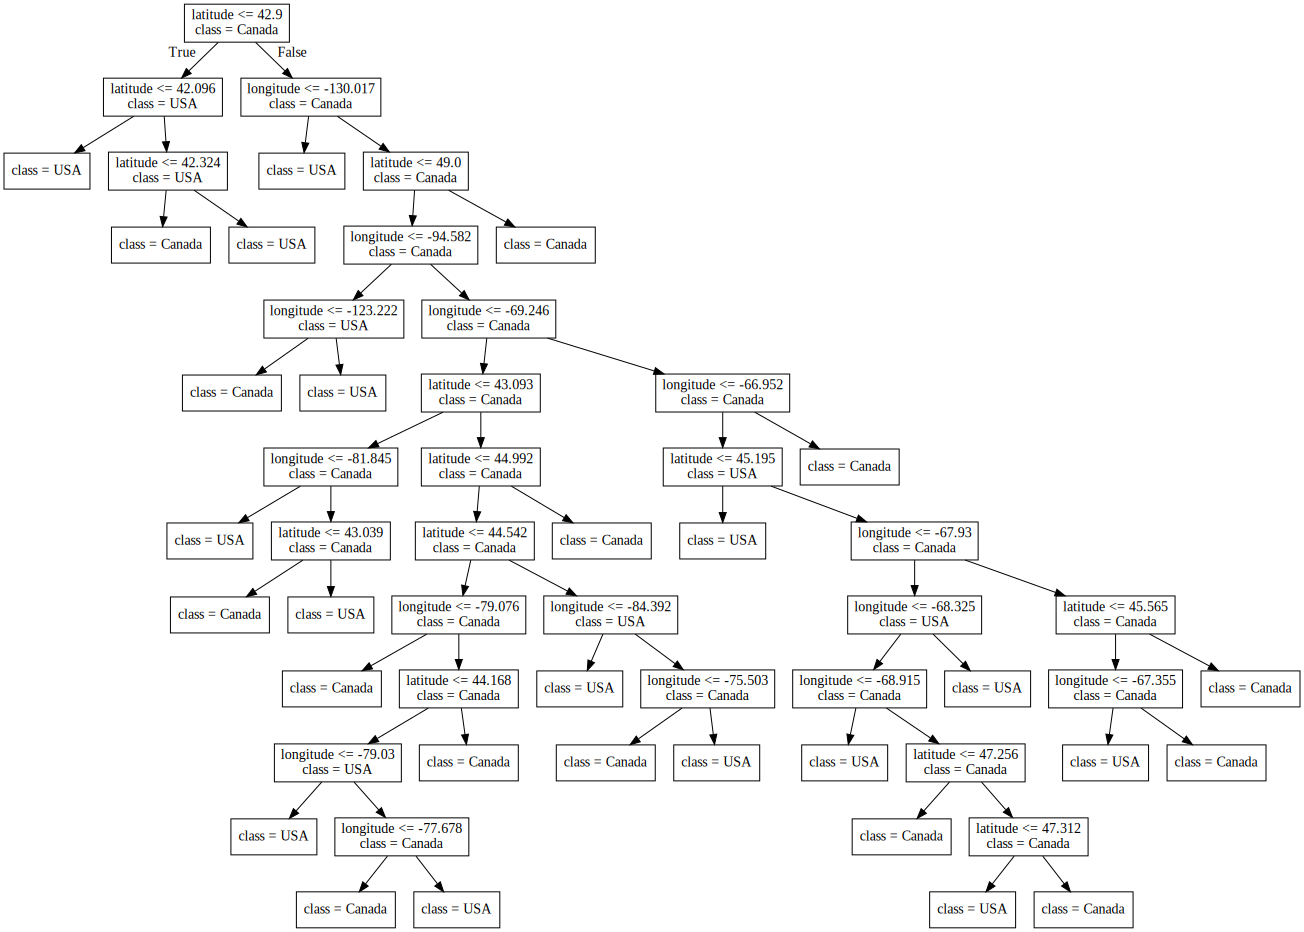

In [261]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
display_tree(X_train.columns, model)

Let's see how on model scores on the training data and the test data.

In [262]:
print("Train score: " + str(round(model.score(X_train, y_train), 2)))
print("Test score: " + str(round(model.score(X_test, y_test), 2)))

Train score: 1.0
Test score: 0.76


For this tree, the training score is 1.0 and the test score is only 0.74.  

The model does not perform quite as well on data that it has not seen. 

Let's look at the training and testing data with the decision boundaries made by the model. 

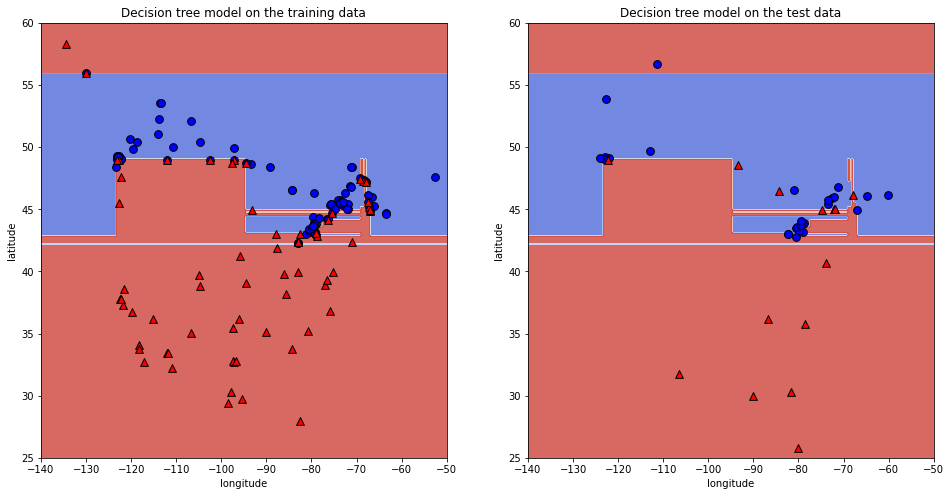

In [264]:
model.fit(X_train, y_train);
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1);
plt.title("Decision tree model on the training data");
plot_classifier(X_train, y_train, model, ticks=True, ax=plt.gca(), lims=(-140,-50,25,60))
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.subplot(1, 2, 2);
plt.title("Decision tree model on the test data")
plot_classifier(X_test, y_test, model, ticks=True, ax=plt.gca(), lims=(-140,-50,25,60))
plt.xlabel("longitude")
plt.ylabel("latitude");

On the left and the right, we have the same boundaries But different data being shown.

The model is getting 100 percent accuracy on the training and for that to happen, the model ends up being extremely specific.

The model got over complicated on the training data and this doesn’t generalize to the test data well.

In the plot on the right, we can see some red triangles in the blue area and that is the model making mistakes which explains the 71% accuracy.

### Parameters in `.train_test_split()`

-`test_size` - test split size (0-1)
- `train_size` - train split size (0-1) (only need to specify one if these
- `random_state` - randomizes the split

In [269]:
train_df, test_df = train_test_split(cities_df, test_size = 0.2, random_state = 123)

In [270]:
train_df, test_df = train_test_split(cities_df, train_size = 0.8, random_state = 123)

In [271]:
train_df, test_df = train_test_split(cities_df,test_size = 0.2, train_size = 0.8, random_state = 123)

There is no hard and fast rule on the split sizes should we use. Some common splits are 90/10, 80/20, 70/30 (training/test).

In the above example, we used an 80/20 split.

But there is a trade-off:
- More training -> More information for our model. 
- More test -> Better assessment of our model.

Now let's look at the random_state argument:

The random_state argument controls this shuffling and without this argument set, each time we split our data, it will be split in a different way.

In [293]:
train_df, test_df = train_test_split(cities_df, test_size = 0.2)
train_df.head()

,longitude,latitude,country
11,-84.3593,46.4906,USA
188,-73.2533,45.3057,Canada
192,-120.3394,50.6758,Canada
81,-129.9912,55.9383,Canada
115,-79.6457,43.5903,Canada


We set this to add a component of reproducibility to our code and if we set it with a `random_state` when we run our code again it will produce the same result. 

In [294]:
train_df_rs5, test_df_rs5 = train_test_split(cities_df, test_size = 0.2, random_state = 5)
train_df_rs5.head()

,longitude,latitude,country
39,-96.7969,32.7763,USA
55,-97.5171,35.4730,USA
40,-121.8906,37.3362,USA
54,-83.0466,42.3316,USA
48,-122.3301,47.6038,USA


In [295]:
train_df_rs7, test_df_rs7 = train_test_split(cities_df, test_size = 0.2, random_state = 7)
train_df_rs7.head()

,longitude,latitude,country
128,-118.7148,50.4165,Canada
195,-122.7454,53.9129,Canada
99,-72.0968,45.0072,Canada
97,-75.5192,44.7184,Canada
14,-78.8784,42.8867,USA


## Train/validation/test split

Remember hyperparameters?     
What dataset do we use if we want to find which hyperparameters produce the best generalized model (also called **hyperparameter optimization**)?      
    
It's a good idea to have separate data for tuning the hyperparameters of a model that is not the test set.

Enter, the ***validation*** set. 

So we actually want to split our dataset into 3 splits: train, validation, and test.

<center><img src="imgs/train-valid-test-split.png"  width = "100%" alt="404 image" /></center>


***Note: There isn't a good consensus on the terminology of what is validation and what is test data.***

We use: 
- **validation data**: data where we have access to the target values, but unlike the training data, we only use this for hyperparameter tuning and model assessment; we don't pass these into `fit`.  

- **test data**: Data where we have access to the target values, but in this case, unlike training and validation data, we neither use it in training nor hyperparameter optimization and only use it **once** to evaluate the performance of the best performing model on the validation set. We lock it in a "vault" until we're ready to evaluate. 

## "Deployment" data

What's the point of making models? 
 > We want to predict something which we do not know the answer to, so we do not have the target values and we only have the features.

After we build and finalize a model, we deploy it, and then the model is used with data in the wild.

We will use **deployment data** to refer to data, where we do not have access to the target values.

Deployment score is the thing we really care about.

We use validation and test scores as proxies for deployment score, and we hope they are similar.

So, if our model does well on the validation and test data, we hope it will do well on deployment data.

## Let's Practice 

1. When is the most optimal time to split our data? 
2. Why do we split our data?

3. Fill in the table below:

|            | `.fit()` | `.score()` | `.predict()` |
|------------|:--------:|:----------:|:------------:|
| Train      |    ✔️     |            |              |
| Validation |          |            |              |
| Test       |          |            |              |
| Deployment |          |            |              |




## Cross-validation


<img src='imgs/train-valid-test-split.png' width="1500" height="1500" />

Problems with having a single train/test split:

- Only using a portion of your full data set for training/testing (data is our most precious resource!!!)
- If your dataset is small you might end up with a tiny training/testing set
- Might be unlucky with your splits such that they don't well represent your data (shuffling data, as is done in `train_test_split()`, is not immune to being unlucky!)


There must be a better way! 

<center><img src="https://media.giphy.com/media/i4gLlAUz2IVIk/giphy.gif"  width = "50%" alt="404 image" /></center>

There is! The answer to our problem is called.....

**Cross-validation** or **𝑘-fold cross-validation**.


<img src='imgs/cross-validation.png' width="100%">



- We still have the test set here at the bottom locked away that we will not touch until the end.
- But, we split the training data into $k$ folds ($k>2$, often $k=10$). In the graphic above $k=4$.
- Each "fold" gets a turn at being the validation set.
- Each round will produce a score so after 𝑘-fold cross-validation, it will produce 𝑘 scores. We usually average over the 𝑘 results.
- Note that cross-validation doesn't shuffle the data; it's done in `train_test_split`.
- We can get now a more “robust” score on unseen data since we can see the variation in the scores across folds.  


***Question: What's the disadvantage then? Why not use larger values for $k$?***

> ....


## What We've Learned Today<a id="9"></a>

- What is machine learning (supervised/unsupervised, classification/regression)
- Machine learning terminology
- What is the decision tree algorithm and how does it work
- The scikit-learn library
- Parameters and hyperparameters